In [1]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain


In [2]:
food_tags = ["restaurant",
        "fast_food",
        "food_court",
        "ice_cream",
        "bakery",
        "cafe",
        "bar",
        "pub",
        "biergarten"]

school_tags = ["kindergarten",
          "driving_school",
          "language_school",
          "college",
          "music_school",
          "university",
          "library",
          "toy_library",
          "school"]
 
healthcare_tags = ["clinic",
              "dentist",
              "doctors",
              "pharmacy",
              "baby_hatch",
              "hospital",
              "nursing_home",
              "social_facility",
              "veterinary"]

entertainment_tags = ["arts_centre",
                 "brothel",
                 "casino",
                 "cinema",
                 "community_centre",
                 "conference_centre",
                 "events_venue",
                 "fountain",
                 "gambling",
                 "love_hotel",
                 "nightclub",
                 "planetarium",
                 "public_bookcase",
                 "social_centre",
                 "stripclub",
                 "studio",
                 "swingerclub",
                 "theatre"]

public_tags = ["courthouse",
          "police",
          "post_office",
          "fire_station",
          "post_depot",
          "prison",
          "ranger_station",
          "townhall",
          "post_box"]

roads = ["motorwoy",
        "trunk",
        "primary",
        "secondary",
        "tertiary",
        "unclassified",
        "residential",
        "motorway_link",
        "trunk_link",
        "primary_link",
        "secondary_link",
        "tertiary_link",
        "living_street",
        "service",
        "pedestrian",
        "track",
        "bus_guideway",
        "escape",
        "raceway",
        "road",
        "busway",
        "footway",
        "bridleway",
        "steps",
        "corridor",
        "path",
        "cycleway"]

In [3]:
%%capture
city = "Hannover Mitte"

buildings = ox.geometries_from_place(query=city, tags={'building':True})

food = ox.geometries_from_place(query=city, tags={"amenity": food_tags})
school = ox.geometries_from_place(query=city, tags={"amenity": school_tags})
healthcare = ox.geometries_from_place(query=city, tags={"amenity": healthcare_tags})
entertainment = ox.geometries_from_place(query=city, tags={"amenity": entertainment_tags})
public = ox.geometries_from_place(query=city, tags={"amenity": public_tags})

retail = ox.geometries_from_place(query=city, tags={"shop": True})
sport = ox.geometries_from_place(query=city, tags={"sport": True})
leisure = ox.geometries_from_place(query=city, tags={'leisure':True})
highway = ox.geometries_from_place(query=city, tags={'highway':roads})
#-----------------------------------------------------------------------------------

food["function"] = "food"
school["function"] = "school"
healthcare["function"] = "healthcare"
entertainment["function"] = "entertainment"
public["function"] = "public"

retail["function"] = "retail"
sport["function"] = "sport"
leisure["function"] = "leisure"
highway["function"] = "highway"


food_buildings = buildings.sjoin(food, how="left")
school_buildings = buildings.sjoin(school, how="left")
healthcare_buildings = buildings.sjoin(healthcare, how="left")
entertainment_buildings = buildings.sjoin(entertainment, how="left")
public_buildings = buildings.sjoin(public, how="left")
retail_buildings = buildings.sjoin(retail, how="left")

sport_buildings = buildings.sjoin(sport, how="left")
leisure_buildings = buildings.sjoin(leisure, how="left")
highway_buildings = buildings.sjoin(highway, how="left")

#---------------------------------------------------------

buildings.reset_index(inplace=True)
food_buildings.reset_index(inplace=True)
school_buildings.reset_index(inplace=True)
healthcare_buildings.reset_index(inplace=True)
entertainment_buildings.reset_index(inplace=True)
public_buildings.reset_index(inplace=True)
retail_buildings.reset_index(inplace=True)
sport_buildings.reset_index(inplace=True)
leisure_buildings.reset_index(inplace=True)
highway_buildings.reset_index(inplace=True)
#-----------------------------------------------------------
buildings["function"] = np.nan
#------------------------------------------------------------
buildings.function.fillna(food_buildings.function,inplace=True)
buildings.function.fillna(school_buildings.function,inplace=True)
buildings.function.fillna(healthcare_buildings.function,inplace=True)
buildings.function.fillna(entertainment_buildings.function,inplace=True)
buildings.function.fillna(public_buildings.function,inplace=True)
buildings.function.fillna(retail_buildings.function,inplace=True)

buildings.function.fillna(sport_buildings.function,inplace=True)
buildings.function.fillna(leisure_buildings.function,inplace=True)
buildings.function.fillna(highway_buildings.function,inplace=True)


In [4]:
print(buildings.function.value_counts())

function
retail           691
leisure          669
highway          639
food             417
school           104
entertainment     78
healthcare        73
public            45
sport             37
Name: count, dtype: int64


#### save buildings geodataframe for using later

####Plotting

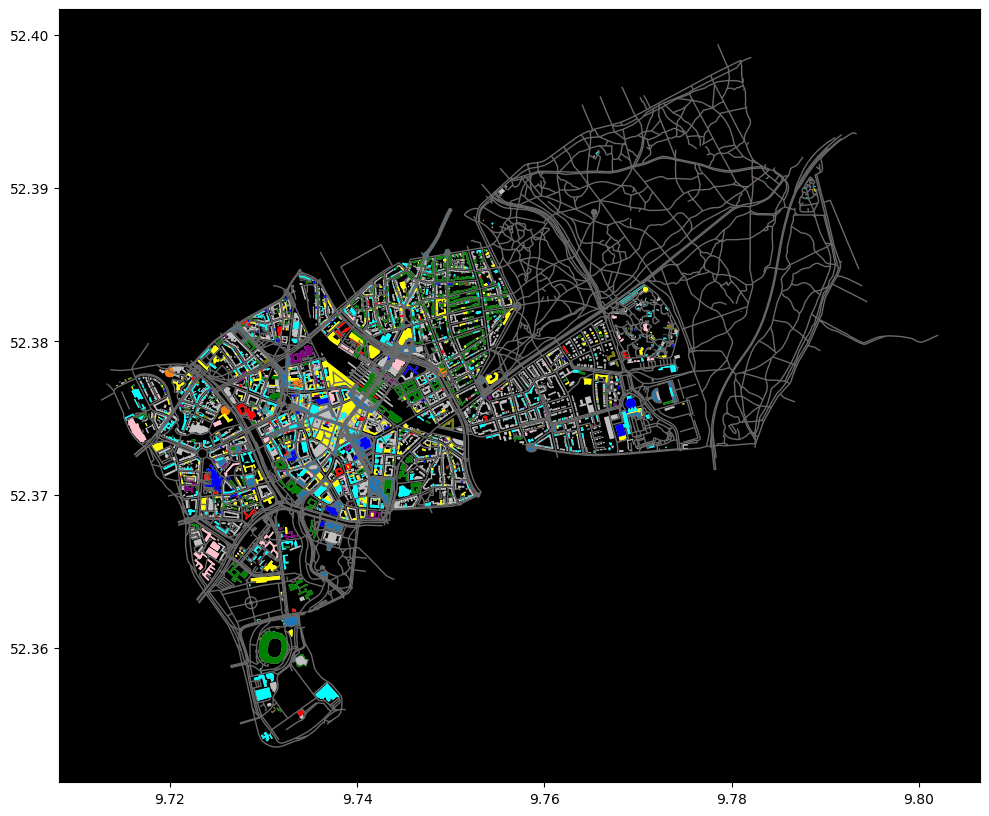

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor((0.0, 0.0, 0.0))

highway.plot(ax=ax, linewidth=1, edgecolor='dimgray')
buildings.plot(ax=ax, facecolor='silver')
buildings[buildings.function == "food"].plot(ax=ax,color='yellow')
buildings[buildings.function == "retail"].plot(ax=ax,color='cyan')
buildings[buildings.function == "healthcare"].plot(ax=ax,color='red')
buildings[buildings.function == "entertainment"].plot(ax=ax,color='blue')
buildings[buildings.function == "school"].plot(ax=ax,color='pink')
buildings[buildings.function == "public"].plot(ax=ax,color='purple')
buildings[buildings.function == "leisure"].plot(ax=ax,color='green')
buildings[buildings.function == "sport"].plot(ax=ax,color='olive')
plt.tight_layout()

In [6]:
!pwd

/home/ducanh/DeepAmenitySegmentation/osmnx


In [7]:
%cd ..
import geopandas as gpd
from shapely.geometry import Point

from utils.region_sampling import Gridgenerating
# Define the city and its bounding box
city_bbox = buildings.total_bounds

# Define the grid spacing (in degrees)
spacing_x = 0.0055  # Adjust the value based on the desired coverage
spacing_y = 0.0055  # Adjust the value based on the desired coverage

# Generate grid points and create bbox from grid cell within the city

Grid_generating = Gridgenerating(city_df=buildings, spacing_x=spacing_x, spacing_y=spacing_y)
#get grid_points
grid_points = Grid_generating.grid_points_in_bbox(bbox=city_bbox)

/home/ducanh/DeepAmenitySegmentation


In [8]:
len(grid_points)

135

### Plotting grid_points 

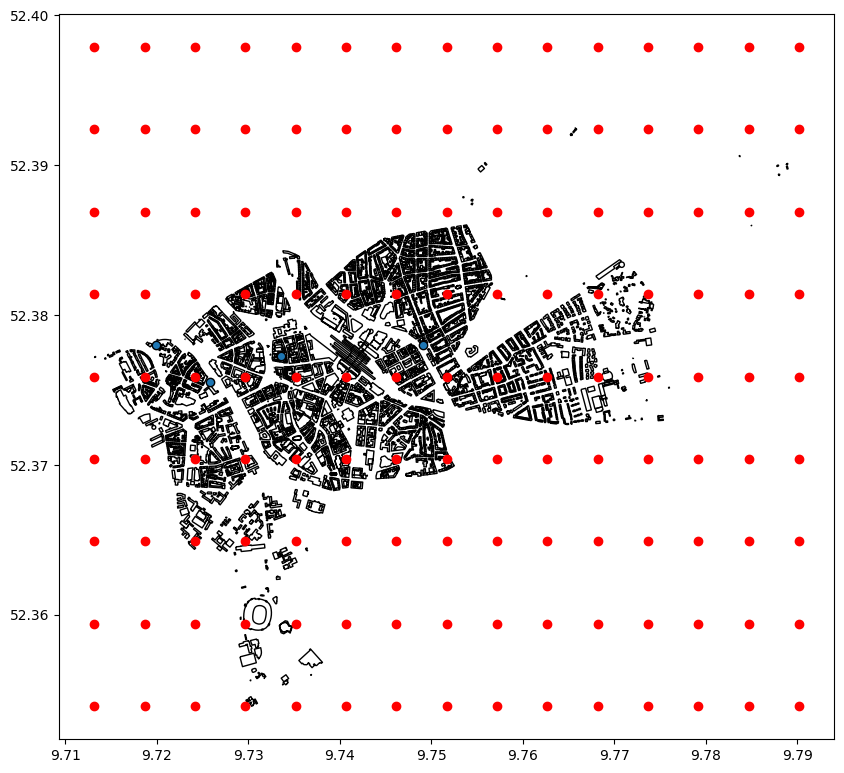

In [9]:
import matplotlib.pyplot as plt

# Visualize the bounding box and grid points
fig, ax = plt.subplots(figsize=(10,10))


# Plot the city boundary
buildings.plot(ax=ax, edgecolor="black", facecolor="none")

# Extract x and y coordinates from the grid_points list
x_coords = [point.x for point in grid_points]
y_coords = [point.y for point in grid_points]

# Plot the grid points
ax.scatter(x_coords, y_coords, color="red", marker="o")

# Display the plot
plt.show()


### drawing random bbox created from grid cell

#### buildings_within is the buildings dataframe inside BBox => use to plot bbox figure
bbox_df is used for visualizing the location of BBox 

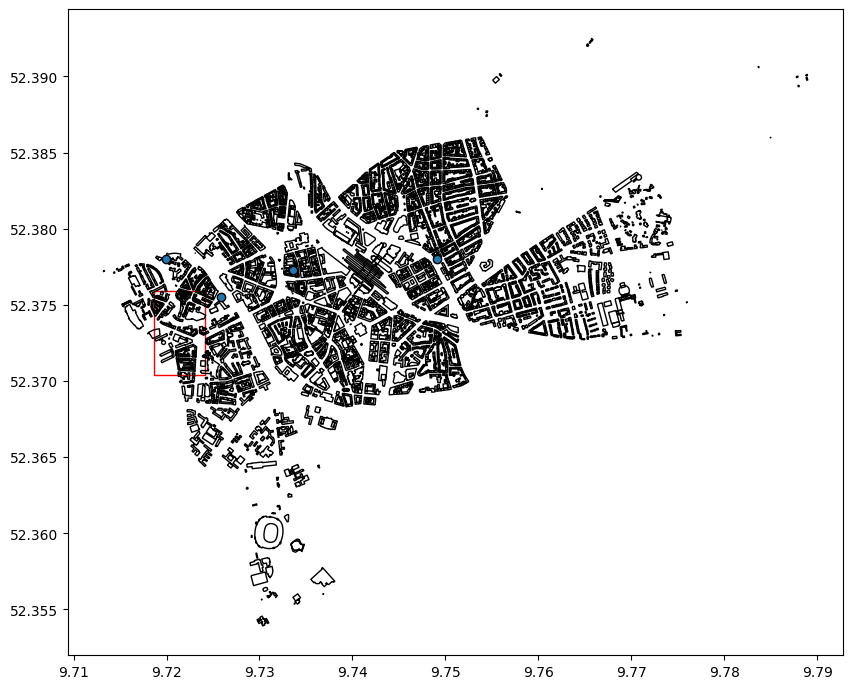

In [10]:
buildings_within, bbox_df = Grid_generating.capture_square_bbox(point_position=21) #if print more fig, just set point_position = loop iteration
fig, ax = plt.subplots(figsize=(10,10))
bbox_df.plot(ax=ax, alpha=1, edgecolor='red', facecolor='none')
buildings.plot(ax=ax, edgecolor='black', facecolor='none')

# show the plot
plt.show()


###Drawing square BBox region 

/home/ducanh/DeepAmenitySegmentation/datasets/demo


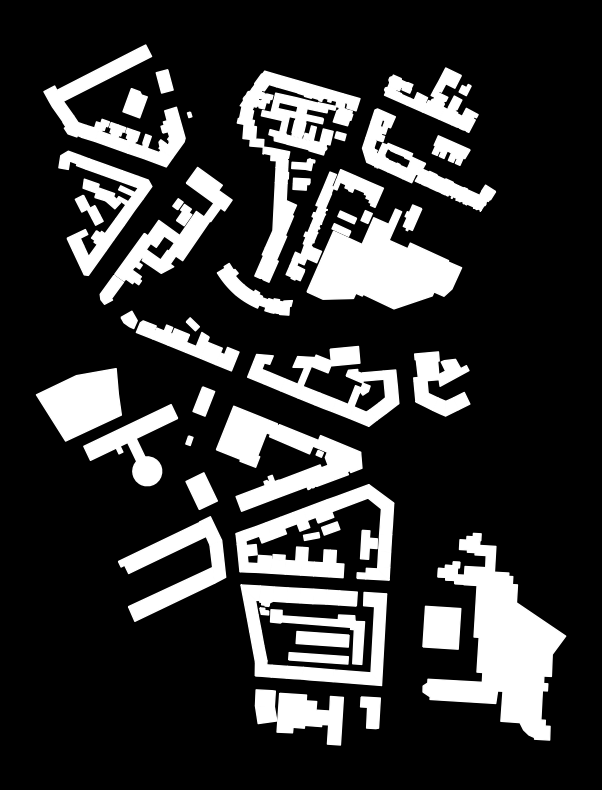

In [26]:
%cd ~/DeepAmenitySegmentation/datasets/demo

fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('black')

buildings_within.plot(ax=ax, edgecolor='white', facecolor='white')
plt.axis('off')

plt.savefig('figure.jpg',dpi=100, format="jpg", bbox_inches='tight')

# show the plot
plt.show()

In [ ]:
%cd ~/DeepAmenitySegmentation/utils
from image_processing import pad_image_to_square

img_path = "/home/ducanh/DeepAmenitySegmentation/datasets/demo/figure.jpg"
img = cv2.imread(img_path)
img_size = 512
padded_img = pad_image_to_square(img, img_size)

cv2.imwrite("/home/ducanh/DeepAmenitySegmentation/datasets/demo/padded.jpg", padded_img)


: 

: 

: 

###encode image to label image format

In [ ]:
import os
import cv2
from label_image import label_image


root_path = 'DeepAmenitySegmentation'
# Define the paths for images and labels
img_path = os.path.join('..', root_path, 'raw_datasets', 'raw_images', 'figure{}.jpg')
label_path = os.path.join('..', root_path, 'raw_datasets', 'raw_labels', 'label{}.tif')

for i in range(0, 200):
    buildings_within_bbox = None
    bbox_visual = None
    img = None
    buildings_within_bbox, bbox_visual = Grid_generating.capture_square_bbox(point_position=i,grid_points=grid_points) 
    if len(buildings_within_bbox) !=0 :
        fig, ax = plt.subplots(figsize=(10,10))
        fig.patch.set_facecolor('black')

        buildings_within_bbox.plot(ax=ax, edgecolor='white', facecolor='white')
        plt.axis('off')

        plt.savefig(img_path.format(i),dpi=100, format="jpg", bbox_inches='tight')
        img = cv2.imread(img_path.format(i))
        
        #generate label for img
        label_image(buildings_within_bbox, img, write_path=label_path.format(i))
        # show the plot
        plt.close()


/home/ducanh/DeepAmenitySegmentation


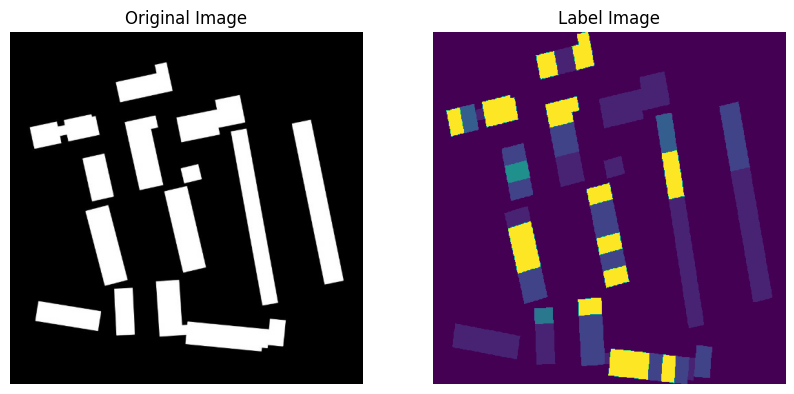

In [23]:
%cd ~/DeepAmenitySegmentation

import os
import cv2
import rasterio
from matplotlib import pyplot as plt

root_path = 'DeepAmenitySegmentation'
# Define the paths for images and labels
img_path = os.path.join('..', root_path, 'datasets', 'images', 'image{}.jpg')
label_path = os.path.join('..', root_path, 'datasets', 'labels', 'label{}.tif')

img = cv2.imread(img_path.format(120))

# Open the label image in read mode
with rasterio.open(label_path.format(120), 'r') as src:
    # Read the label image data
    label_image = src.read(1)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot the original image
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.axis('off')
    ax1.set_title('Original Image')
    
    # Plot the label image
    ax2.imshow(label_image)
    ax2.axis('off')
    ax2.set_title('Label Image')
    
    plt.show()


#### stratified sampling

In [ ]:
from shapely import Polygon, MultiPolygon, Point


def extract_point(geometry):
    if isinstance(geometry, Point):
        return np.array([geometry.x, geometry.y])
    elif isinstance(geometry, Polygon):
        return np.array(geometry.centroid.coords[0])
    elif isinstance(geometry, MultiPolygon):
        largest_polygon = max(geometry.geoms, key=lambda x: x.area)
        return np.array(largest_polygon.centroid.coords[0])

In [ ]:
amenity_points = []
# extract all POINT type coordinates
retail = buildings[buildings.function == "retail"]
food = buildings[buildings.function == "food"]
school = buildings[buildings.function == "school"]
entertainment = buildings[buildings.function == "entertainment"]
healthcare = buildings[buildings.function == "healthcare"]
public = buildings[buildings.function == "public"]
sport = buildings[buildings.function == "sport"]
leisure = buildings[buildings.function == "leisure"]
highway = buildings[buildings.function == "highway"]
nan_amenity = buildings[buildings['function'].isna()]

for geometry in retail['geometry']:
    amenity_points.append(extract_point(geometry))

for geometry in food['geometry']:
    amenity_points.append(extract_point(geometry))

for geometry in school['geometry']:
    amenity_points.append(extract_point(geometry))

for geometry in entertainment['geometry']:
    amenity_points.append(extract_point(geometry))

for geometry in healthcare['geometry']:
    amenity_points.append(extract_point(geometry))

for geometry in public['geometry']:
    amenity_points.append(extract_point(geometry))

for geometry in sport['geometry']:
    amenity_points.append(extract_point(geometry))   

for geometry in leisure['geometry']:
    amenity_points.append(extract_point(geometry))   

for geometry in highway['geometry']:
    amenity_points.append(extract_point(geometry))   

for geometry in nan_amenity['geometry']:
    amenity_points.append(extract_point(geometry))   

print("number of amenity points for the whole city: {}".format(len(amenity_points)))
exploded = buildings.explode(index_parts=True)

number of amenity points for the whole city: 4966


In [ ]:
from io import BytesIO
from utils.label_image import label_image
from utils.image_processing import pad_image_to_square, pad_tif_to_square
from PIL import Image
import rasterio
import cv2
import matplotlib.pyplot as plt
import numpy as np


image_path = "/home/ducanh/DeepAmenitySegmentation/datasets/images{}/image{}.jpg"
label_path = "/home/ducanh/DeepAmenitySegmentation/datasets/labels{}/label{}.tif"
img_size = 512
count = 0
dist_list = [100,150,200,250,300, 350, 400, 450, 500, 550]

for i in dist_list:
    for j in amenity_points:
        center_point = (j[1], j[0]) #center_point = (latitude, longtitude)
        bbox = ox.utils_geo.bbox_from_point(center_point, dist=i)

        bbox_polygon = Polygon([(bbox[3],bbox[1]), (bbox[2], bbox[1]),(bbox[2], bbox[0]), (bbox[3], bbox[0])])
        #checking if polygons inside the bbox
        check_polygon = exploded.geometry.within(bbox_polygon)

        #return all rows, which have polygons inside bbox
        polygon_inbbox = check_polygon[check_polygon.values == True]

        #using isin() to extract subtable contains only polygon_inbbox.index
        indexs = polygon_inbbox.index
        condition = exploded['geometry'].index.isin(indexs)
        buildings_inbbox = exploded[condition]

        #mapping amenities inside bbox into the new axis
        if len(buildings_inbbox.geometry) != 0: #perform labelling only when there is building inside bbox
        #plotting time
            fig1, ax1 = plt.subplots(figsize=(10,10))
            ax1.set_aspect(1)
            fig1.patch.set_facecolor('black')
            plt.axis('off')
            buildings_inbbox.plot(ax=ax1, edgecolor='white', facecolor='white')
            count += 1
            
            img_buffer = BytesIO()
            plt.savefig(img_buffer, dpi=100, format="jpg", bbox_inches='tight')
            img_buffer.seek(0)
            img = Image.open(img_buffer)
            img = np.array(img)  
            
            # Generate label for img
            label_data, label_profile, num_classes = label_image(buildings_inbbox, img, j)
            tif_buffer = BytesIO()
            
            with rasterio.open(tif_buffer, 'w', **label_profile) as label_dst:
                label_dst.write(label_data)
            tif_buffer.seek(0)
            
            # Process padding image from rectangle to fixed square size 
            padded_img = pad_image_to_square(img, img_size)
            cv2.imwrite(image_path.format(i, count), padded_img)
            
            # Process padding label
            pad_tif_to_square(tif_buffer, label_path.format(i, count), img_size)

            plt.close()
            
            img_buffer.close()
            tif_buffer.close()

    print("Adding padding to bounding box and processing images successfully")


Adding padding to bounding box and processing images successfully
Adding padding to bounding box and processing images successfully
Adding padding to bounding box and processing images successfully
Adding padding to bounding box and processing images successfully
Adding padding to bounding box and processing images successfully
Adding padding to bounding box and processing images successfully
Adding padding to bounding box and processing images successfully
Adding padding to bounding box and processing images successfully
Adding padding to bounding box and processing images successfully
Adding padding to bounding box and processing images successfully


In [ ]:
exploded = buildings.explode(index_parts=True)
c = 0
dist = 300
for j in list_points:
    c += 1
    # raster = np.zeros(shape=(size,size))  # A[i][j] = "(long, latt)"
    center_point = (j[1], j[0]) #center_point = (latitude, longtitude)
    bbox = ox.utils_geo.bbox_from_point(center_point, dist=dist)

    bbox_polygon = Polygon([(bbox[3],bbox[1]), (bbox[2], bbox[1]),(bbox[2], bbox[0]), (bbox[3], bbox[0])])
    #checking if polygons inside the bbox
    check_polygon = exploded.geometry.within(bbox_polygon)

    #return all rows, which have polygons inside bbox
    polygon_inbbox = check_polygon[check_polygon.values == True]

    #using isin() to extract subtable contains only polygon_inbbox.index
    indexs = polygon_inbbox.index
    condition = exploded['geometry'].index.isin(indexs)
    buildings_inbbox = exploded[condition]

    #mapping amenities inside bbox into the new axis
    if len(buildings_inbbox.geometry) != 0: #perform labelling only when there is building inside bbox
    #plotting time
        fig1, ax1 = plt.subplots(figsize=(10,10))
        # ax1.set_aspect(1)
        fig1.patch.set_facecolor('black')
        plt.axis('off')
        buildings_inbbox.plot(ax=ax1, edgecolor='white', facecolor='white')
        buildings_inbbox[buildings_inbbox.function == "food"].plot(ax=ax1,color='yellow')
        buildings_inbbox[buildings_inbbox.function == "retail"].plot(ax=ax1,color='cyan')
        buildings_inbbox[buildings_inbbox.function == "healthcare"].plot(ax=ax1,color='red')
        buildings_nan = buildings_inbbox[buildings_inbbox['function'].isna()]
        buildings_nan.plot(ax=ax1, color='blue')
        buildings_inbbox[buildings_inbbox.function == "school"].plot(ax=ax1,color='pink')
        buildings_inbbox[buildings_inbbox.function == "public"].plot(ax=ax1,color='purple')
        if c >= 1:
            break
        

## generate testset with random points across city


In [ ]:
min_long, min_lat, max_long, max_lat = city_bbox

In [ ]:
#genrate random lattitude, longitude with min,max range
import random

def generate_random_floats(n, a, b): #n: number of random points
    random_floats = [random.uniform(a, b) for i in range(n)]
    return random_floats

# random_lat = generate_random_floats(1000, 52.36, 52.39)
# random_long = generate_random_floats(1000, 9.71, 9.80)

random_lat = generate_random_floats(1000, min_lat, max_lat)
random_long = generate_random_floats(1000, min_long, max_long)

random_coords = combined_list = [(x, y) for x, y in zip(random_long, random_lat)]

In [ ]:
random_coords

[(9.73987386536778, 52.38802535344148),
 (9.7601260836786, 52.36713452569181),
 (9.74287582918132, 52.37657745775215),
 (9.757087226170299, 52.38650389825306),
 (9.788697564273917, 52.3820337335474),
 (9.74790643456371, 52.363347941901516),
 (9.783279721841861, 52.38620135324618),
 (9.766493573657591, 52.35694812797831),
 (9.773587000257773, 52.38532525298639),
 (9.785101692125464, 52.38177526658643),
 (9.745818566247667, 52.39084571552785),
 (9.718347531246371, 52.366415726535635),
 (9.749802190101247, 52.3738617132801),
 (9.739500732371015, 52.390260539086654),
 (9.787706150214072, 52.36991534574097),
 (9.77339290618458, 52.35474124234642),
 (9.750838175714387, 52.363735028903896),
 (9.753239655899733, 52.37762891174017),
 (9.7527262745435, 52.355982945708945),
 (9.749549879932232, 52.391518590091266),
 (9.716297988352528, 52.39035771046498),
 (9.774467156161318, 52.36462609733935),
 (9.741526866100441, 52.377525644271245),
 (9.761217633358932, 52.370477204661285),
 (9.72445588983498